In [32]:
#baseline -> num counter picks, num counter bans, side
#final -> num counterpicks, num counter bans, pga, side, champ wr, team wr


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

import pandas as pd

In [49]:
df = pd.read_csv('complete_df.csv')
df


,Unnamed: 0,year,gameid,teamname,side,ban1,ban2,ban3,ban4,ban5,...,pick3,pick4,pick5,num_counters,num_counters_banned,PGA,higher_PGA,mean_wr,team_wr,result
0,0,2017,1506-1540,I May,Blue,Syndra,Malzahar,Ashe,Karma,Poppy,...,Cassiopeia,Varus,Tahm Kench,0,2,2,1,0.508666,0.438776,1
1,1,2017,1506-1540,Royal Never Give Up,Red,Camille,Rengar,Zyra,Elise,Rek'Sai,...,Ryze,Caitlyn,Nautilus,0,0,0,0,0.493086,0.598582,0
2,2,2017,1506-1541,I May,Blue,Syndra,Malzahar,Ashe,Rek'Sai,Kha'Zix,...,Corki,Caitlyn,Thresh,0,0,0,0,0.510833,0.438776,1
3,3,2017,1506-1541,Royal Never Give Up,Red,Rengar,Camille,Varus,Cassiopeia,Orianna,...,Ryze,Jhin,Zyra,1,0,1,1,0.492558,0.598582,0
4,4,2017,1508-1551,Team WE,Blue,Elise,Ryze,Tahm Kench,Trundle,Nautilus,...,Orianna,Ashe,Zyra,2,2,4,1,0.502399,0.507962,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86893,86893,2025,LOLTMNT06_96972,BK ROG Esports,Red,Skarner,Vi,Aurora,K'Sante,Jax,...,Akali,Corki,Neeko,1,0,1,1,0.500987,0.550000,1
86894,86894,2025,LOLTMNT06_96989,BK ROG Esports,Blue,Maokai,K'Sante,Viktor,Sion,Jax,...,Jayce,Ezreal,Nautilus,0,1,1,0,0.493530,0.550000,1
86895,86895,2025,LOLTMNT06_96989,Galions,Red,Skarner,Ambessa,Vi,Rell,Rakan,...,Corki,Kai'Sa,Leona,2,0,2,1,0.493466,0.625000,0
86896,86896,2025,LOLTMNT06_96993,Joblife,Blue,Varus,Sejuani,Kalista,Yone,Smolder,...,Jayce,Ezreal,Nautilus,0,0,0,0,0.503357,0.472527,0


# Baseline Model = Decision Tree on Num counters, Num counters_banned, Side

In [35]:
X_train, X_test, y_train, y_test = (
    train_test_split(df[['num_counters','num_counters_banned', 'side']], df['result'], random_state=1)
)

preproc = ColumnTransformer(
    transformers=[
        ('side', OneHotEncoder(), ['side'])
    ],
    remainder='passthrough',
)

pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=1))
])

hyperparameters = {
    'classifier__max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None],
    'classifier__min_samples_split': [2, 5, 10, 20, 50, 100, 200],
    'classifier__criterion': ['gini', 'entropy']
}

searcher = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, scoring='accuracy')

searcher.fit(X_train, y_train)

training_accuracy = searcher.score(X_train, y_train)

testing_accuracy = searcher.score(X_test, y_test)

print("Best Parameters:", searcher.best_params_)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__min_samples_split': 2}
Training Accuracy: 0.5297439123563439
Testing Accuracy: 0.525385500575374


# Improved Baseline Model = Random Forest Classifier on Num counters, Num counters_banned, Side

In [36]:
X_train, X_test, y_train, y_test = (
    train_test_split(df[['num_counters','num_counters_banned', 'side']], df['result'], random_state=1)
)

preproc = ColumnTransformer(
    transformers=[
        ('side', OneHotEncoder(), ['side'])
    ],
    remainder='passthrough',
)

pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', RandomForestClassifier(random_state=1, n_jobs=-1))
])

hyperparameters = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__criterion': ['gini', 'entropy']
}

searcher = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, scoring='accuracy')

searcher.fit(X_train, y_train)

training_accuracy = searcher.score(X_train, y_train)

testing_accuracy = searcher.score(X_test, y_test)

print("Best Parameters:", searcher.best_params_)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Training Accuracy: 0.5299587252389794
Testing Accuracy: 0.5255235903337169


# Final Model - Random Forest on Num Counter Picks, Num Counters Banned, Side, PGA, Higher_PGA, Champ Mean WR, Team Mean WR

In [37]:
X_train, X_test, y_train, y_test = (
    train_test_split(df[['num_counters','num_counters_banned', 'side', 'PGA', 'higher_PGA', 'team_wr','mean_wr']], df['result'], random_state=1)
)

preproc = ColumnTransformer(
    transformers=[
        ('side', OneHotEncoder(), ['side'])
    ],
    remainder='passthrough',
)


pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', RandomForestClassifier(random_state=1, n_jobs=-1))
])


hyperparameters = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__criterion': ['gini', 'entropy']
}

searcher = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit Model
searcher.fit(X_train, y_train)

# Get Best Model
best_model = searcher.best_estimator_

# Accuracy Scores
training_accuracy = best_model.score(X_train, y_train)
testing_accuracy = best_model.score(X_test, y_test)

# Display Results
print("Best Parameters:", searcher.best_params_)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 50}
Training Accuracy: 0.5998649747594863
Testing Accuracy: 0.5947065592635213


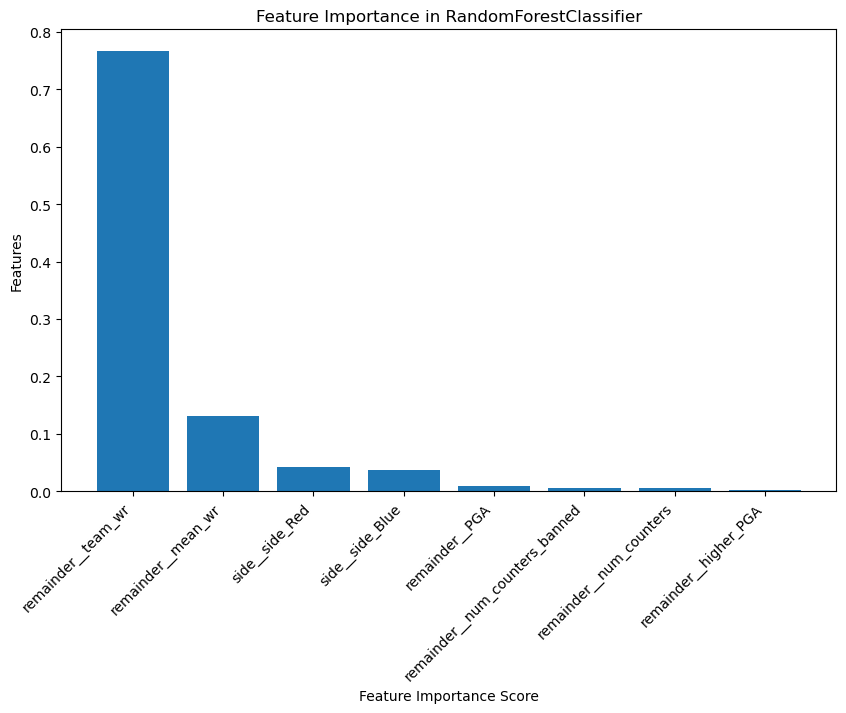

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the best model
best_model = searcher.best_estimator_
feature_importance = best_model.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Sort feature importance
indices = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[indices], align='center')
plt.xticks(range(len(feature_importance)), np.array(feature_names)[indices], rotation=45, ha="right")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in RandomForestClassifier")
plt.show()


# Given that a big weighted importance is team wr, lets try removing it in case its overwhelming the model 

In [43]:
X_train, X_test, y_train, y_test = (
    train_test_split(df[['num_counters','num_counters_banned', 'side', 'PGA', 'higher_PGA', 'mean_wr']], df['result'], random_state=1)
)

preproc = ColumnTransformer(
    transformers=[
        ('side', OneHotEncoder(), ['side'])
    ],
    remainder='passthrough',
)


pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', RandomForestClassifier(random_state=1, n_jobs=-1))
])


hyperparameters = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__criterion': ['gini', 'entropy']
}

searcher = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit Model
searcher.fit(X_train, y_train)

# Get Best Model
best_model = searcher.best_estimator_

# Accuracy Scores
training_accuracy = best_model.score(X_train, y_train)
testing_accuracy = best_model.score(X_test, y_test)

# Display Results
print("Best Parameters:", searcher.best_params_)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 200}
Training Accuracy: 0.5477114756110659
Testing Accuracy: 0.5376294591484465


# Since the accuracy decreased, we know that was not the case. Lets try logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Define features and target
X = df[['num_counters', 'num_counters_banned', 'side', 'PGA', 'higher_PGA', 'mean_wr', 'team_wr']]
y = df['result']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Preprocessing pipeline
from sklearn.impute import SimpleImputer

# Updated preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Fill NaN with mean
            ('scaler', StandardScaler())
        ]), ['num_counters', 'num_counters_banned', 'PGA', 'higher_PGA', 'mean_wr', 'team_wr']),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill NaN with most common category
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), ['side'])
    ]
)


# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Hyperparameter tuning
hyperparameters = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['lbfgs', 'liblinear']
}

searcher = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, scoring='accuracy')

# Train model
searcher.fit(X_train, y_train)

# Evaluate model
training_accuracy = searcher.score(X_train, y_train)
testing_accuracy = searcher.score(X_test, y_test)

# Print results
print("Best Parameters:", searcher.best_params_)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)



Best Parameters: {'classifier__C': 0.01, 'classifier__solver': 'liblinear'}
Training Accuracy: 0.5999416936461418
Testing Accuracy: 0.6028998849252014
